In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline 

In [101]:
df = pd.read_csv('df5619B_caba.csv',sep=',')

In [102]:
#Para visualizar los datos y sus correlaciones
#sns.pairplot(df)

In [103]:
df=df.drop(df.loc[(df['sup_total']>250)!= (df['ratio_sup']>1.8)].index)


In [104]:
df=df.drop(df.loc[(df['ambientes']>=6)].index)

In [105]:
df=df.drop(df.loc[(df['precio_m2']>5000)!= (df['precio_m2']<1000)].index)

In [106]:
df

,tipo_propiedad,localidad,sup_total,sup_cubierta,precio_m2,ambientes,ratio_sup,amenities,cochera,precio_m2_Media,precio_m2_Mediana,ratio_price_Media,ratio_price_Mediana,sup_cub_exp2,sup_ambientes,pond
0,PH,Mataderos,55.0,40.0,1550.0,2.0,1.335570,0,0,1893.1,1855.0,0.654317,0.684502,1600.0,20.000000,52310.239976
1,apartment,Mataderos,55.0,55.0,1310.0,2.0,1.000000,0,0,2196.2,2180.0,0.759078,0.804428,3025.0,27.500000,84903.276682
2,apartment,Belgrano,45.0,40.0,3450.0,1.0,1.125000,0,0,3525.1,3340.0,1.218389,1.232472,1600.0,40.000000,305347.501657
3,apartment,Belgrano,65.0,60.0,3250.0,2.0,1.083333,0,0,3525.1,3340.0,1.218389,1.232472,3600.0,30.000000,305347.501657
4,apartment,Palermo Soho,50.0,30.0,3720.0,1.0,1.666667,0,0,3720.0,3540.0,1.285753,1.306273,900.0,30.000000,363550.508648
5,apartment,Palermo Soho,42.0,31.0,4770.0,1.0,1.354839,0,0,3720.0,3540.0,1.285753,1.306273,961.0,31.000000,363550.508648
6,PH,Mataderos,140.0,98.0,2440.0,4.0,1.335570,0,0,1893.1,1855.0,0.654317,0.684502,9604.0,24.500000,52310.239976
7,apartment,Palermo,104.0,96.0,3650.0,3.0,1.083333,0,0,3651.1,3380.0,1.261938,1.247232,9216.0,32.000000,316449.979125
8,apartment,Palermo,118.0,73.0,3710.0,4.0,1.616438,0,0,3651.1,3380.0,1.261938,1.247232,5329.0,18.250000,316449.979125
9,apartment,Flores,43.0,43.0,1740.0,2.0,1.000000,0,0,2273.3,2270.0,0.785726,0.837638,1849.0,21.500000,95858.922302


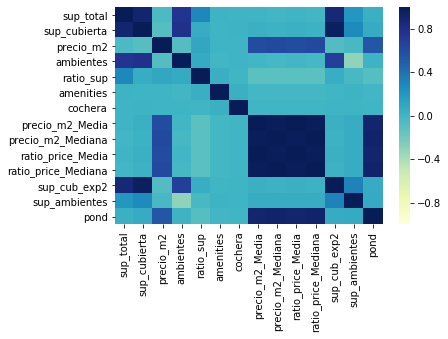

In [107]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

# 1 Celda modificable para elegir las variables 

In [108]:
#Se seleccionan las varibales que a priori y viendo el heatmap podemos intuir que pueden ser significativas en el modelo

df2 = df.loc[:,['tipo_propiedad', 'localidad', 'sup_total', 'sup_cubierta', 'ambientes', 'ratio_sup', 'amenities', 'cochera']]
#df = df.drop(['precio_m2_Media'], axis=1)
#df = df.drop(['ratio_price_Mediana'], axis=1)
#df = df.drop(['ratio_precio_comuna'], axis=1)
#df = df.drop(['rate_barrio_exp2'], axis=1)
#df = df.drop(['ratio_precio_barrio'], axis=1)
df2

,tipo_propiedad,localidad,sup_total,sup_cubierta,ambientes,ratio_sup,amenities,cochera
0,PH,Mataderos,55.0,40.0,2.0,1.335570,0,0
1,apartment,Mataderos,55.0,55.0,2.0,1.000000,0,0
2,apartment,Belgrano,45.0,40.0,1.0,1.125000,0,0
3,apartment,Belgrano,65.0,60.0,2.0,1.083333,0,0
4,apartment,Palermo Soho,50.0,30.0,1.0,1.666667,0,0
5,apartment,Palermo Soho,42.0,31.0,1.0,1.354839,0,0
6,PH,Mataderos,140.0,98.0,4.0,1.335570,0,0
7,apartment,Palermo,104.0,96.0,3.0,1.083333,0,0
8,apartment,Palermo,118.0,73.0,4.0,1.616438,0,0
9,apartment,Flores,43.0,43.0,2.0,1.000000,0,0


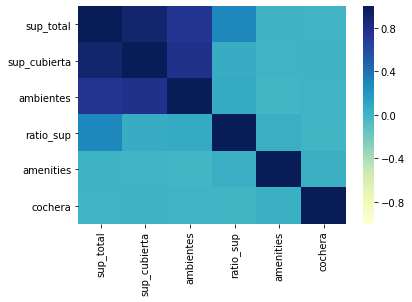

In [109]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(df2.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [110]:
#Verificamos si hay nulos

df2.isnull().sum()

tipo_propiedad    0
localidad         0
sup_total         0
sup_cubierta      0
ambientes         0
ratio_sup         0
amenities         0
cochera           0
dtype: int64

# 2 Generamos las dummies que van dentro del modelo

In [111]:
propiedad_dummies = pd.get_dummies(df2.tipo_propiedad, prefix=None, prefix_sep='_', drop_first=False)
loc_dummies = pd.get_dummies(df2.localidad, prefix=None, prefix_sep='_', drop_first=False)

In [112]:
df2 = df2.drop(['tipo_propiedad'], axis=1)
df2 = df2.drop(['localidad'], axis=1)


In [113]:
df3 = pd.concat([df2, loc_dummies, propiedad_dummies], axis=1)

In [114]:
df3

,sup_total,sup_cubierta,ambientes,ratio_sup,amenities,cochera,Abasto,Agronomía,Almagro,Balvanera,...,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house
0,55.0,40.0,2.0,1.335570,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,55.0,55.0,2.0,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,45.0,40.0,1.0,1.125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,65.0,60.0,2.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,50.0,30.0,1.0,1.666667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,42.0,31.0,1.0,1.354839,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,140.0,98.0,4.0,1.335570,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,104.0,96.0,3.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,118.0,73.0,4.0,1.616438,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,43.0,43.0,2.0,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


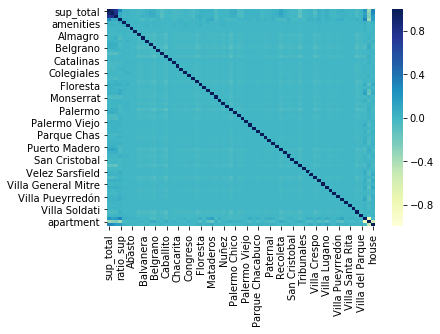

In [115]:
sns.heatmap(df3.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

## Generamos nuestra variable objetivo y nuestas variables independientes

In [116]:
y = df['precio_m2']

In [117]:
#y

In [118]:
#dfr = df3.drop(['precio_m2'], axis=1)#si no la habiamos quitado antes
dfr = df3

In [119]:
y.shape


(21204,)

In [120]:
dfr.shape

(21204, 70)

Quedamos con 25384 obs y 71
features

## Pasos para importar el modelo e instanciarlo

In [121]:
#importar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

from sklearn import datasets, linear_model
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [122]:
#hay que instanciar al modelo

model = LinearRegression()

In [123]:
X = dfr

In [124]:
X

,sup_total,sup_cubierta,ambientes,ratio_sup,amenities,cochera,Abasto,Agronomía,Almagro,Balvanera,...,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house
0,55.0,40.0,2.0,1.335570,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,55.0,55.0,2.0,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,45.0,40.0,1.0,1.125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,65.0,60.0,2.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,50.0,30.0,1.0,1.666667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,42.0,31.0,1.0,1.354839,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,140.0,98.0,4.0,1.335570,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,104.0,96.0,3.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,118.0,73.0,4.0,1.616438,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,43.0,43.0,2.0,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Regresión lineal sin Split

In [125]:
X.shape

(21204, 70)

In [126]:
y.shape

(21204,)

In [127]:
lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)

print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)
print ('R2_train=', ' ', model.score(X, y))

Intercepto=   1599.0624895651722
RM=   [    0.727    -3.738    11.686   731.455   111.42    188.606  -157.487
   -67.212   -74.535  -425.075  -260.396   573.8     782.48   -615.455
  -492.525   205.975  -276.329   -80.019   -41.899   377.32    372.229
  -392.004  -521.469  -256.13   -452.122  1030.191  -301.908  -378.04
  -215.379  -264.002   714.831  -519.254   774.442  1538.717   855.14
   903.361   726.83   -683.411    76.068  -330.575    15.824  -333.864
  -279.058  -714.997  2068.285   873.676   294.526   253.239  -267.53
  -192.773    44.929  -193.312  -493.816  -298.251   261.298    26.619
  -203.25   -859.996  -185.739   120.042    14.865  -292.923  -904.332
  -135.087 -1096.404   318.299    33.573  -139.324   277.428  -138.104]
R2_train=   0.43388997983375094


In [128]:
#Array de las predicciones
predictions

array([1972.479, 2087.711, 3376.768, ..., 3484.735, 3473.319, 2956.907])

In [129]:
#Diferencia entre las predicciones y las "y" reales

dif = y - predictions

In [130]:
dif

0        -422.479112
1        -777.711246
2          73.232140
3         -47.770721
4        -214.867423
5        1072.777176
6         599.107656
7         454.769204
8          16.991899
9        -505.744835
10        -81.051928
11       -163.708494
12      -2935.802048
13        -40.668480
15       -498.463826
17        253.913194
18        283.913194
19      -1072.222482
20        264.366161
21        123.492098
22       -208.522745
25       -378.790508
26       -173.767356
27       -355.883212
28       -428.071259
29       -527.476119
32       -931.975350
33      -1053.210077
34       1063.666268
35       1145.940368
            ...     
24397      -0.701005
24398      -0.582337
24400   -1600.296582
24401    -468.556643
24402    -707.185716
24404     123.982051
24405     141.375284
24406     388.276505
24407    1112.869447
24409    -128.971770
24411    -532.608393
24413    -127.448491
24414    -168.436901
24415     438.109584
24416    -251.011872
24417     490.664508
24418    -817

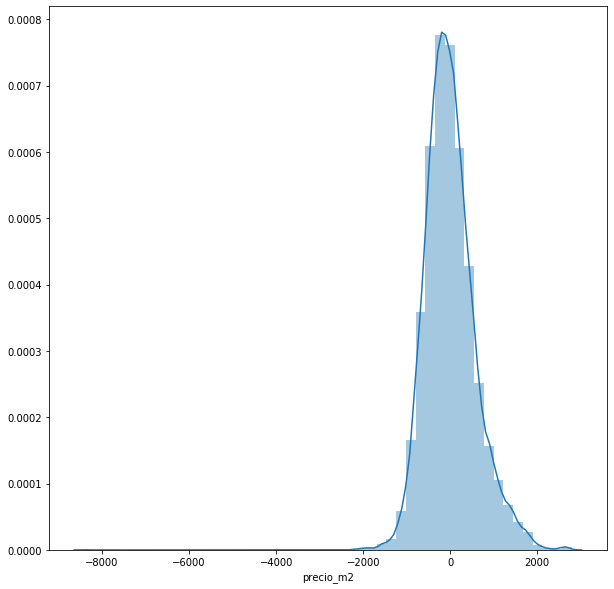

In [131]:
#Graficamos la distribucion de los errores, vemos como siguen una distribucion normalizada 

from scipy.stats import norm
sns.distplot(dif)
#fit=norm

## Una de las formas de dividir el modelo entre los distintos set de entrenamiento y testeo

In [132]:
#Dividir los datos entre el set de entrenamiento y el de testeo
#X = dfr

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,\
                            random_state=44)

## El modelo acá ya ve los datos

In [133]:
#Aplicar el modelo a los datos

model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
model.coef_

array([    0.233,    -3.246,    13.456,   938.289,    62.003,   305.327,
        -194.302,   -54.559,   -66.678,  -403.081,  -276.839,   583.646,
         781.175,  -616.586,  -505.626,   212.245,  -296.276,   -78.103,
         -26.308,   410.707,   364.316,  -366.708,  -557.021,  -248.06 ,
        -458.907,  1053.669,  -303.628,  -423.534,  -224.54 ,  -247.282,
         714.771,  -499.953,   766.896,  1601.547,   839.692,   900.347,
         823.404,  -713.691,   125.35 ,  -335.   ,    10.566,  -342.826,
        -303.284,  -670.605,  2060.257,   876.04 ,   323.12 ,   212.822,
        -249.84 ,  -141.856,    43.088,  -215.11 ,  -498.112,  -281.281,
         250.216,    -1.423,  -178.975,  -884.193,  -185.262,   128.801,
          29.687,  -324.229, -1028.406,  -141.758, -1100.125,   310.589,
          21.013,  -158.117,   296.9  ,  -138.783])

In [135]:
model.intercept_



1353.6239629202216

In [136]:
ypred = model.predict(Xtest)

In [137]:
ypred 

array([3440.659, 2215.239, 2687.972, ..., 2138.134, 2539.939, 3391.502])

# Resultados en el set de entrenamiento

In [138]:
print ('Intercepto=', ' ', model.intercept_)

print ('R2_train=', ' ', model.score(Xtrain, ytrain))

Intercepto=   1353.6239629202216
R2_train=   0.4418749330882277


# Resultados en el set de testeo

In [139]:
print ('Intercepto=', ' ', model.intercept_)

print ('R2_test=', ' ', model.score(Xtest, ytest))

Intercepto=   1353.6239629202216
R2_test=   0.40103332414053494


# Lineal(con otro random state), Ridge y Lasso. Todos con Train_test_split

POR SEPARADO

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=89)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16963, 70) (16963,)
(4241, 70) (4241,)


#Corremos la lineal

In [141]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train))

 Score Train Lineal: 0.44



In [143]:
y_pred_tr_lm = lm.predict(X_train)

In [144]:
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm))

 Train RMSE lineal   : 579.29 



In [145]:
y_pred_lm = lm.predict(X_test)

In [146]:
print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test))

 Score Test Lineal: 0.41



In [147]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(1469.0993198740773,
 array([    0.228,    -3.291,    15.278,   845.138,   130.135,   145.11 ,
         -125.217,   -86.867,   -77.215,  -440.643,  -265.243,   578.954,
          764.619,  -639.659,  -482.026,   204.775,     0.   ,  -121.052,
          -46.695,   361.434,   376.275,  -396.322,  -511.297,  -268.851,
         -452.107,  1045.218,  -310.678,  -393.121,  -219.19 ,  -195.454,
          701.81 ,  -545.117,   774.902,  1537.256,   850.748,   905.122,
          710.794,  -659.241,    41.333,  -347.137,   -12.985,  -363.408,
         -286.941,  -791.898,  2046.337,   873.341,   289.154,   238.979,
         -268.43 ,  -200.33 ,    33.15 ,  -148.667,  -465.541,  -245.781,
          262.723,    10.954,  -251.524,  -844.624,  -188.09 ,   121.584,
            6.46 ,  -342.774,  -922.375,  -112.17 , -1070.26 ,   318.632,
           44.374,  -145.965,   285.149,  -139.184]))

In [148]:
print(" Test RMSE lineal   : %.2f \n" % rmse(y_test, y_pred_lm))

 Test RMSE lineal   : 589.09 



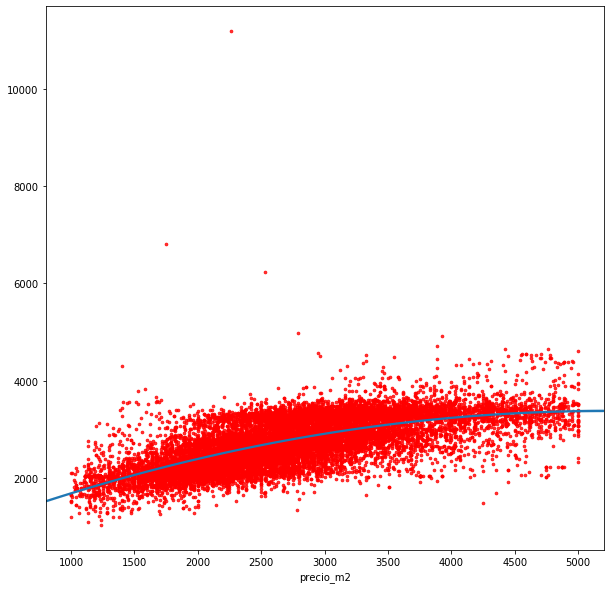

In [149]:
sns.regplot(y_train, y_pred_tr_lm,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

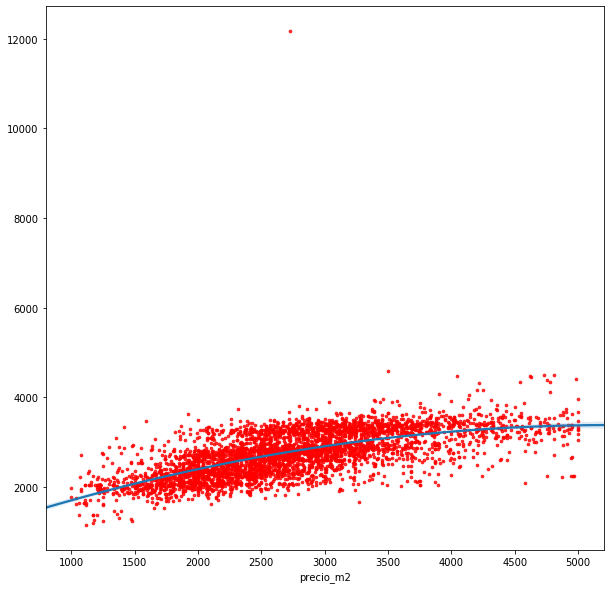

In [150]:
sns.regplot(y_test, y_pred_lm,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

##Acá intentamos buscar los mejores alfas. De generarse un alfa cercano o igual a uno de los extremos, cambiar el rango del alfa del modelo.

In [151]:
al_ridge = np.linspace(0.0001, 0.4, 300)
al_lasso = np.linspace(0.001, 0.015, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

## Ridge

In [152]:
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=True)

In [153]:
lm_ridge_cv.fit(X_train, y_train)
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n')

Alpha Ridge: 0.016149498327759196 



In [154]:
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)

In [155]:
y_pred_ridge = lm_ridge_cv.predict(X_test)

In [156]:
print ("Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train))

Score Train Ridge : 0.44



In [157]:
print ("Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test))

Score Test Ridge : 0.41



In [158]:
"Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge)

'Test RMSE Ridge = 588.91\n'

Vemos los nombres de las variables y sus coeficientes

In [159]:
#Si es interpretable se coloca en la presentación
dict(zip(X.columns, lm_ridge_cv.coef_))

{'sup_total': 0.08260432799856665,
 'sup_cubierta': -2.9552445582382085,
 'ambientes': 11.915588566406612,
 'ratio_sup': 836.2303921239413,
 'amenities': 128.69290518334276,
 'cochera': 142.63868750065282,
 'Abasto': -337.3945056375158,
 'Agronomía': -298.7838918508363,
 'Almagro': -290.23022232449046,
 'Balvanera': -648.3754342497085,
 'Barracas': -476.0005861030349,
 'Barrio Norte': 354.03944834398436,
 'Belgrano': 538.6401251188399,
 'Boca': -842.2970118121464,
 'Boedo': -688.3973148847542,
 'Caballito': -12.58100926173285,
 'Catalinas': 0.0,
 'Centro / Microcentro': -333.1856958062523,
 'Chacarita': -258.809067123915,
 'Coghlan': 142.4950320822595,
 'Colegiales': 155.06335851161745,
 'Congreso': -604.6116889497044,
 'Constitución': -717.5489401083711,
 'Flores': -478.77913037559097,
 'Floresta': -657.7380555873389,
 'Las Cañitas': 814.6254453388757,
 'Liniers': -518.5614830402632,
 'Mataderos': -599.4352525119796,
 'Monserrat': -430.61651078798485,
 'Monte Castro': -406.71186230300

In [160]:
(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

(1761.2383487786108,
 array([    0.083,    -2.955,    11.916,   836.23 ,   128.693,   142.639,
         -337.395,  -298.784,  -290.23 ,  -648.375,  -476.001,   354.039,
          538.64 ,  -842.297,  -688.397,   -12.581,     0.   ,  -333.186,
         -258.809,   142.495,   155.063,  -604.612,  -717.549,  -478.779,
         -657.738,   814.625,  -518.561,  -599.435,  -430.617,  -406.712,
          476.757,  -752.065,   548.586,  1293.903,   624.319,   677.742,
          484.399,  -861.819,  -174.728,  -556.434,  -229.087,  -570.884,
         -497.238,  -991.303,  1793.184,   643.212,    68.459,    21.931,
         -478.303,  -411.64 ,  -181.184,  -361.51 ,  -669.768,  -453.184,
           45.82 ,  -202.499,  -460.336, -1044.456,  -397.836,   -93.51 ,
         -206.831,  -549.181, -1124.903,  -322.9  , -1264.183,   100.395,
         -169.702,  -210.394,   218.192,  -210.027]))

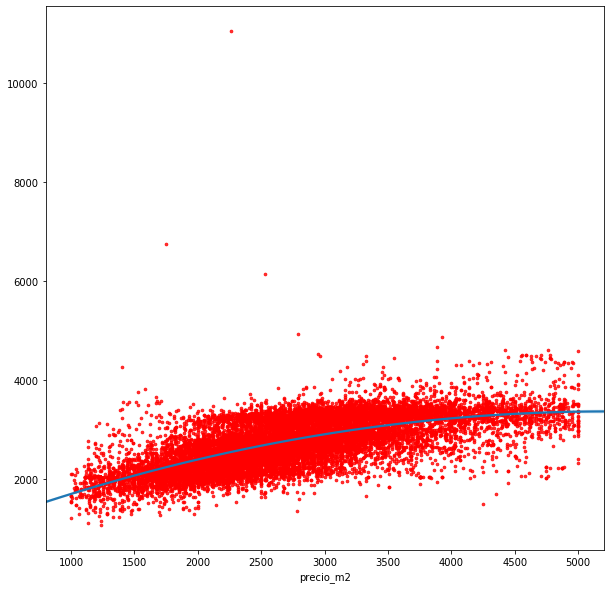

In [161]:
sns.regplot(y_train, y_pred_tr_ridge,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

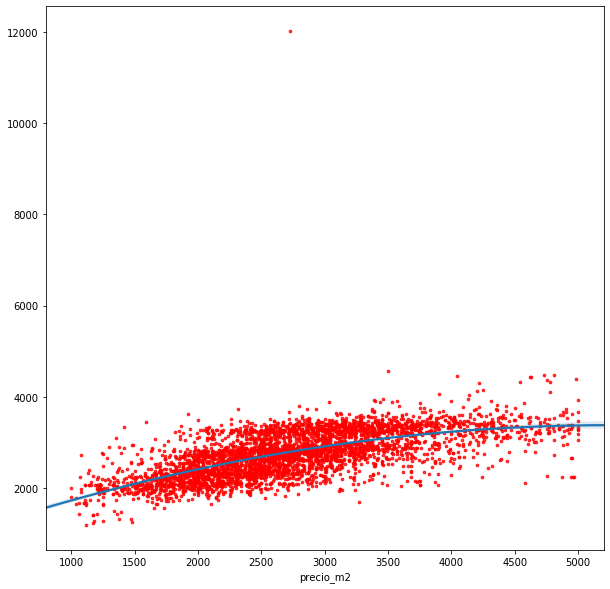

In [162]:
sns.regplot(y_test, y_pred_ridge,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

## Lasso

In [163]:
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=True)

In [164]:
lm_lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.001  , 0.00105, ..., 0.01495, 0.015  ]), copy_X=True,
    cv=KFold(n_splits=5, random_state=12, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [165]:
print('Alpha LASSO:',lm_lasso_cv.alpha_,'\n')

Alpha LASSO: 0.0070869565217391295 



In [166]:
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)

In [167]:
y_pred_lasso = lm_lasso_cv.predict(X_test)

In [168]:
y_pred_lasso.shape

(4241,)

In [169]:
y_test.shape

(4241,)

In [170]:
print ("Score Train Ridge : %.2f\n" % lm_lasso_cv.score(X_train, y_train))

Score Train Ridge : 0.44



In [171]:
print ("Score Test Ridge : %.2f\n" % lm_lasso_cv.score(X_test, y_test))

Score Test Ridge : 0.41



In [172]:
"Test RMSE Lasso = %.2f\n" %  rmse(y_test, y_pred_lasso)

'Test RMSE Lasso = 589.17\n'

Vemos los nombres de las variables y sus coeficientes

In [173]:
#Si es interpretable se coloca en la presentación
dict(zip(X.columns, lm_lasso_cv.coef_))

{'sup_total': 0.0,
 'sup_cubierta': -2.9119191155079376,
 'ambientes': 12.111829200572103,
 'ratio_sup': 851.54491730943,
 'amenities': 118.04195679530865,
 'cochera': 125.00969068625278,
 'Abasto': -139.35622642670737,
 'Agronomía': -91.31074043824763,
 'Almagro': -101.39538905051502,
 'Balvanera': -463.27519627517825,
 'Barracas': -286.12516208049425,
 'Barrio Norte': 544.7088232352806,
 'Belgrano': 733.0484238802082,
 'Boca': -657.0340425467897,
 'Boedo': -503.71421395460754,
 'Caballito': 173.02586284011983,
 'Catalinas': 0.0,
 'Centro / Microcentro': -137.88178064763446,
 'Chacarita': -64.7234222184645,
 'Coghlan': 324.00317477298756,
 'Colegiales': 339.2640626277557,
 'Congreso': -416.31727416761527,
 'Constitución': -530.6293153481403,
 'Flores': -293.0116671311194,
 'Floresta': -471.87731659293894,
 'Las Cañitas': 1005.5728208315876,
 'Liniers': -329.1016138890968,
 'Mataderos': -411.9098703339461,
 'Monserrat': -241.8510004230181,
 'Monte Castro': -205.26135387369294,
 'Nuñez'

In [174]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(1347.4271936789833,
 array([    0.   ,    -2.912,    12.112,   851.545,   118.042,   125.01 ,
         -139.356,   -91.311,  -101.395,  -463.275,  -286.125,   544.709,
          733.048,  -657.034,  -503.714,   173.026,     0.   ,  -137.882,
          -64.723,   324.003,   339.264,  -416.317,  -530.629,  -293.012,
         -471.877,  1005.573,  -329.102,  -411.91 ,  -241.851,  -205.261,
          667.752,  -562.247,   743.055,  1490.721,   815.391,   867.973,
          655.86 ,  -665.311,     0.   ,  -363.389,   -20.392,  -382.341,
         -304.091,  -794.679,  1995.749,   839.346,   249.082,   204.43 ,
         -289.235,  -217.442,     0.071,  -159.722,  -464.102,  -249.327,
          230.773,    -8.746,  -258.078,  -859.74 ,  -208.038,    76.581,
          -10.614,  -345.519,  -869.654,  -119.126, -1041.238,   286.532,
            9.825,    -0.916,   428.69 ,    -0.   ]))

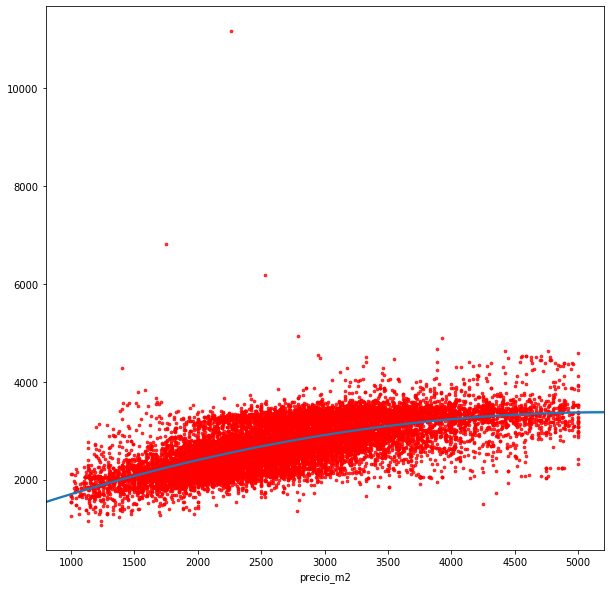

In [175]:
sns.regplot(y_train, y_pred_tr_lasso,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

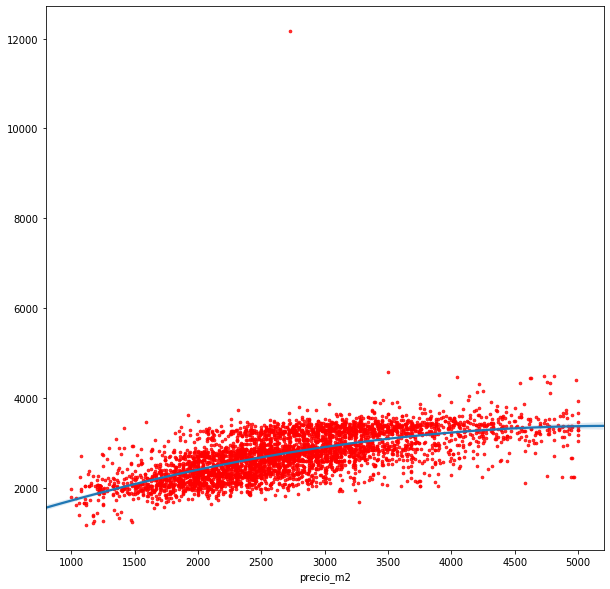

In [176]:
sns.regplot(y_test, y_pred_lasso,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

In [177]:
print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train))


print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso))

 Score Train Lineal: 0.44
 Score Train Ridge : 0.44
 Score Train Lasso : 0.44

 Score Test Lineal: 0.41
 Score Test Ridge : 0.41
 Score Test Lasso : 0.41

 Test RMSE lineal= 589.09
 Test RMSE Ridge = 588.91
 Test RMSE Lasso = 589.17


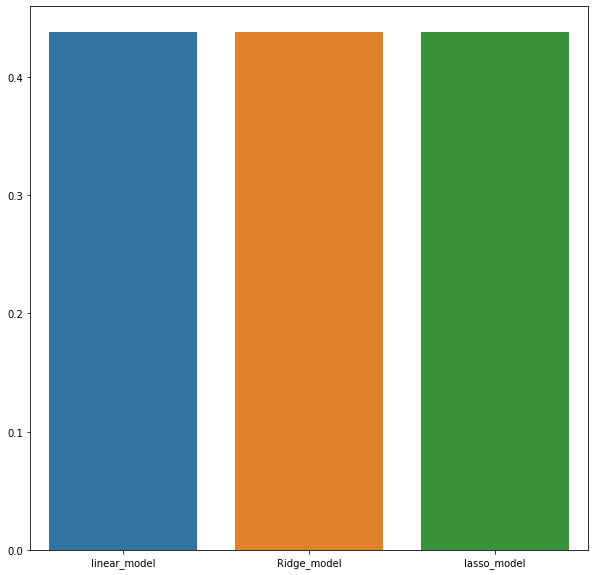

In [178]:
rb = sns.barplot(x=['linear_model','Ridge_model','lasso_model'], y=[lm.score(X_train, y_train),lm_ridge_cv.score(X_train, y_train),lm_lasso_cv.score(X_train, y_train)])

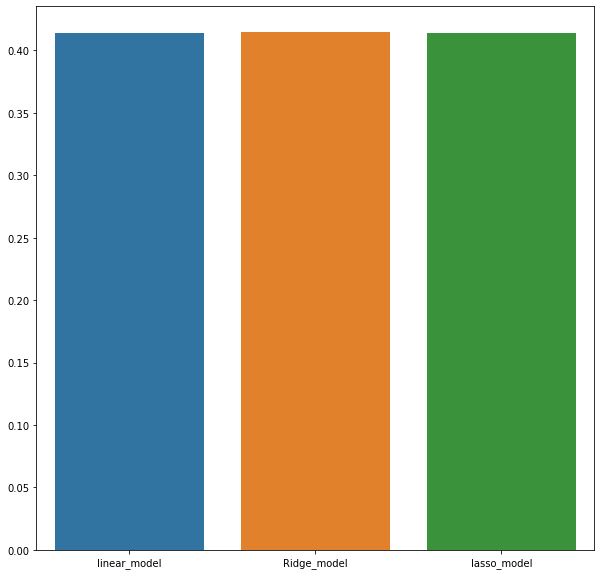

In [179]:
rbp = sns.barplot(x=['linear_model','Ridge_model','lasso_model'], y=[lm.score(X_test, y_test),lm_ridge_cv.score(X_test, y_test),lm_lasso_cv.score(X_test, y_test)])

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=79)


In [181]:
y_test

12392    2290.000000
6239     2890.000000
9046     1980.000000
18430    2500.000000
11643    2150.000000
5778     2430.000000
709      2540.000000
24001    3380.000000
19837    3240.000000
22473    2340.000000
17230    3020.000000
23422    2280.000000
11916    2330.000000
203      1700.000000
13660    3340.000000
196      3940.000000
23622    4350.000000
18314    2310.000000
20241    3410.000000
11077    2940.000000
10733    1750.000000
19106    3160.000000
17996    2600.000000
17570    4570.000000
22254    2590.000000
4743     1930.000000
6053     5000.000000
5026     1170.000000
18407    1700.000000
21195    3020.000000
            ...     
5258     1920.000000
21823    1180.000000
13673    2610.000000
8658     1400.000000
8549     2880.000000
1791     2660.000000
10426    2600.000000
6937     2410.000000
5002     1710.000000
17845    3110.000000
7472     2670.000000
1525     2470.000000
16715    2770.000000
1290     3250.000000
4236     4850.000000
17241    2700.000000
5042     1230

In [182]:
y_pred_lasso1 = lm_lasso_cv.predict(X_test)

print( "Score Test Ridge : %.2f\n" % lm_lasso_cv.score(X_test, y_pred_lasso1))

print("Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_lasso1))

Score Test Ridge : 1.00

Test RMSE Ridge = 622.79



In [183]:
a1=pd.DataFrame( columns=['precio_imputado'])
a1['precio_imputado']=y_test
a1['precio_predicho']=y_pred_lasso1
a1['diferencia']=a1['precio_imputado']-a1['precio_predicho']
a1.head()

,precio_imputado,precio_predicho,diferencia
12392,2290.0,2339.556394,-49.556394
6239,2890.0,2255.570619,634.429381
9046,1980.0,2375.205380,-395.205380
18430,2500.0,2641.729115,-141.729115
11643,2150.0,2534.808472,-384.808472


In [184]:
a1['direccion']='sobrevalorado'


In [185]:
a1.loc[(a1['diferencia'] < 0),['direccion']]='subvaluada'

In [186]:
a1.head()

,precio_imputado,precio_predicho,diferencia,direccion
12392,2290.0,2339.556394,-49.556394,subvaluada
6239,2890.0,2255.570619,634.429381,sobrevalorado
9046,1980.0,2375.205380,-395.205380,subvaluada
18430,2500.0,2641.729115,-141.729115,subvaluada
11643,2150.0,2534.808472,-384.808472,subvaluada


In [187]:
a1a=a1.loc[(a1['direccion']=='sobrevalorado')]
a1b=a1.loc[(a1['direccion']=='subvaluada')]

In [188]:
a1a.count()


precio_imputado    42
precio_predicho    42
diferencia         42
direccion          42
dtype: int64

In [189]:
a1b.count()

precio_imputado    58
precio_predicho    58
diferencia         58
direccion          58
dtype: int64

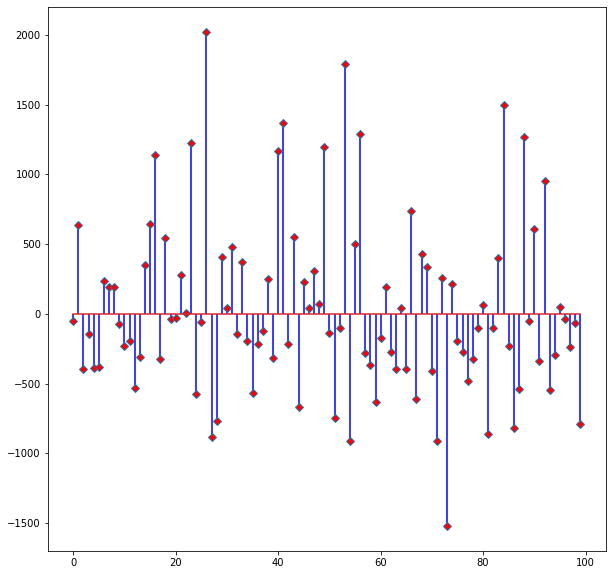

In [193]:
markerline, stemlines, baseline = plt.stem(
   a1['diferencia'],linefmt='blue', markerfmt='D', bottom=1.1, use_line_collection=True, data=a1)
markerline.set_markerfacecolor('red')
plt.show()

#Probamos aumentando los grados polinómicos

In [194]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
X2 = poly.fit_transform(X)
print(X2) 

[[55. 40.  2. ...  0.  0.  0.]
 [55. 55.  2. ...  1.  0.  0.]
 [45. 40.  1. ...  1.  0.  0.]
 ...
 [38. 35.  2. ...  1.  0.  0.]
 [44. 39.  1. ...  1.  0.  0.]
 [46. 39.  1. ...  1.  0.  0.]]


In [195]:
# Verificamos los Shape
X2.shape

(21204, 2555)

In [196]:
y.shape

(21204,)

De nuevo pero los 3 juntos

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state=79)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16963, 2555) (16963,)
(4241, 2555) (4241,)


In [218]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.1,1,10)
al_lasso = np.linspace(0.001,1,300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=True)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=True)

In [202]:
# Hacemos los fits respectivos
lm.fit(X_train, y_train)
#lm_ridge_cv.fit(X_train, y_train)
lm_lasso_cv.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

LassoCV(alphas=array([0.001  , 0.00434, ..., 0.99666, 1.     ]), copy_X=True,
    cv=KFold(n_splits=5, random_state=12, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
lm_ridge_cv.fit(X_train, y_train)

In [203]:
print(#'Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n')

Alpha LASSO: 0.004341137123745819 



In [205]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      #"Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = lm.predict(X_train)
#y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
     # "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso))

 Score Train Lineal: 0.50
 Score Train Lasso : 0.50

 Train RMSE lineal   : 544.39 
 Train RMSE Lasso    : 547.46 



In [206]:
np.set_printoptions(precision=3, suppress=True)

(lm.intercept_, lm.coef_)

(1563.9203643637934,
 array([   6.713,  -16.505,  -47.793, ..., -261.218,    0.   ,  101.757]))

In [207]:
#(lm_ridge_cv.intercept_,lm_ridge_cv.coef_)

In [208]:
(lm_lasso_cv.intercept_,lm_lasso_cv.coef_)

(809.4193285347073,
 array([ 1.295, -4.325, -0.   , ...,  0.   ,  0.   ,  0.   ]))

In [209]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

y_pred_lm = lm.predict(X_test)
#y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)


print(" Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
     # "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test))

# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
     # "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso))

 Score Test Lineal: 0.47
 Score Test Lasso : 0.49

 Test RMSE lineal= 558.98
 Test RMSE Lasso = 548.68


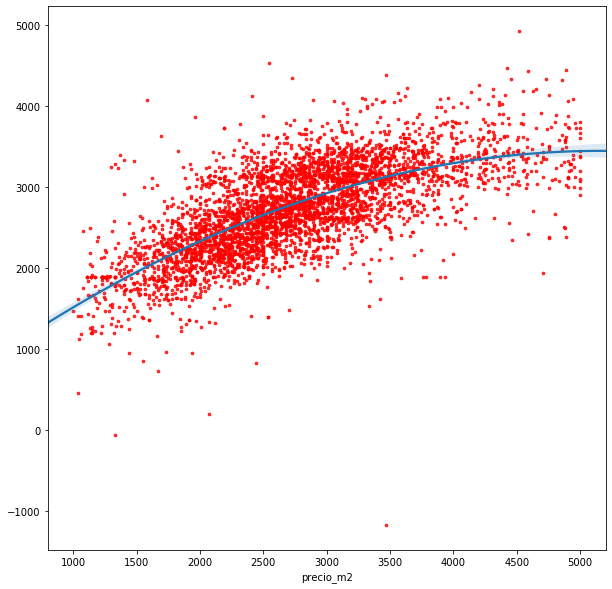

In [210]:
sns.regplot(y_test, y_pred_lm,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

In [211]:
#sns.regplot(y_test, y_pred_ridge,order=2,ci=95,\
  # scatter_kws={'color':'r', 's':7})

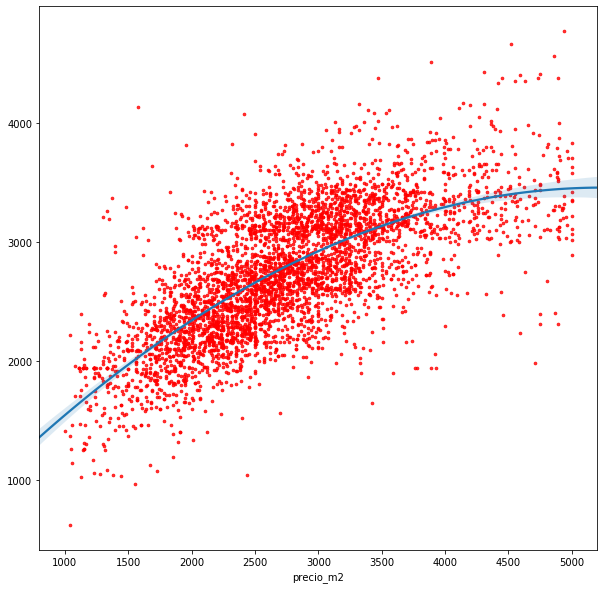

In [212]:
sns.regplot(y_test, y_pred_lasso,order=2,ci=95,\
   scatter_kws={'color':'r', 's':7})

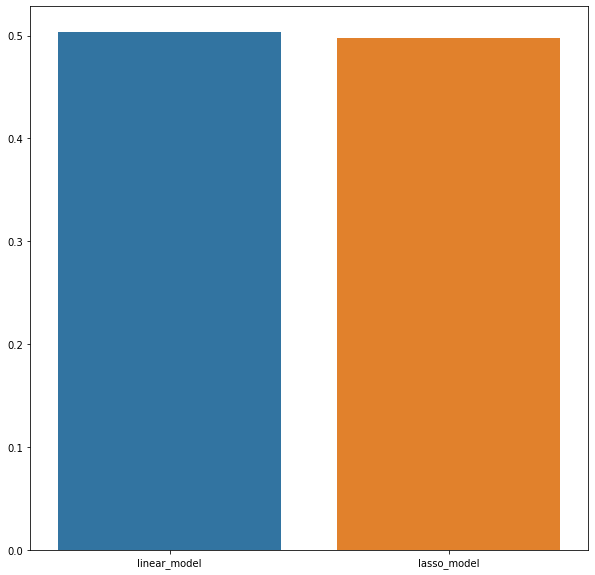

In [213]:
rb = sns.barplot(x=['linear_model','lasso_model'], y=[lm.score(X_train, y_train),lm_lasso_cv.score(X_train, y_train)])

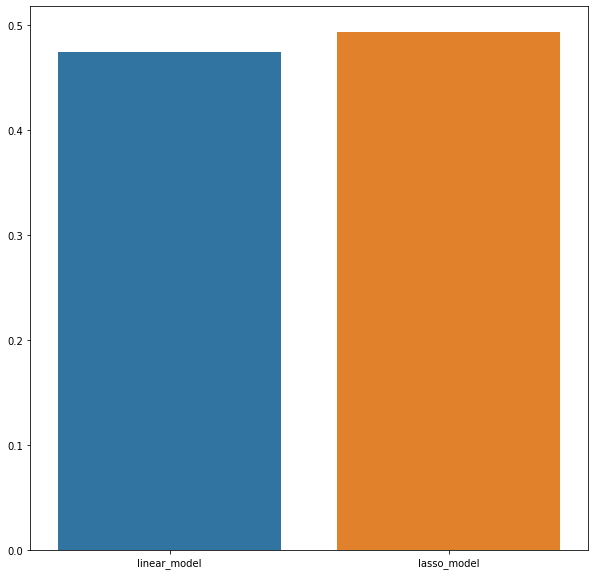

In [214]:
rbp = sns.barplot(x=['linear_model','lasso_model'], y=[lm.score(X_test, y_test),lm_lasso_cv.score(X_test, y_test)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=79)

In [ ]:
y_test

In [ ]:
y_pred_lasso2 = lm_lasso_cv.predict(X_test)

In [ ]:
print( "Score Test Ridge : %.2f\n" % lm_lasso_cv.score(X_test, y_pred_lasso2))

In [ ]:
print("Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_lass02))

In [ ]:
a1=pd.DataFrame( columns=['precio_imputado'])

a1['precio_imputado']=y_test
a1['precio_predicho']=y_pred_ridge
a1.head()

In [ ]:
a1['diferencia']=a1['precio_imputado']-a1['precio_predicho']
a1.head()

In [ ]:
markerline, stemlines, baseline = plt.stem(
    a1['diferencia'],linefmt='blue', markerfmt='D', bottom=1, use_line_collection=True,data=a1)
markerline.set_markerfacecolor('red')
plt.show()